<a href="https://colab.research.google.com/github/rileyseefeldt/MAT421/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 3 Calculus and Optimization

##3.2 Continuity and Differation

Limits of a Function:

Let f D -> R be a function. Then f has a limit L as x approaches a if, for all ε > 0, there exists a δ > 0 such that  |f(x) − L| < ε as x -> a.

Continuity definition for functions

Let f D -> R be a function. Then f is considered continuous at a if lim(x->a) = f(a).

Extreme Value theorem

Let f : D → R be a real-valued, continuous
function on a nonempty, closed, bounded set D ⊆ Rd . Then f attains a maximum and a minimum on D.

Derivatives

Let f : D → R where D ⊆ R and let x0 ∈ D be an interior point of D. The derivative of f at x0 is

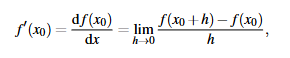

Mean Value Theorem:

Let f -> R be continuous over [a,b] and differentialbe over (a,b). Then there exists a c such that a < c < b and

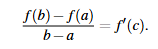

In [7]:
import numpy as np

#defining simple function
def f(x):
  return x**2 + 3*x + 2

#limit definition
def limit(f, a, h=0.001):
  return (f(a + h) + f(a - h)) / 2

#derivative definition
def derivative(f, a, h = 0.001):
  return (f(a + h) - f(a)) / h

#continuous at a point definition
def isContinuous(f, a, tolerance = 0.001):
  #checks if limit of f(a) is withing tolerance level from actual f(a) value
  return np.isclose(limit(f,a), f(a), atol=tolerance)

def mean_value_theorem(f, a, b, num_points=1000, tolerance = 0.001):
    #computes 1000 points in the interval f
    x_vals = np.linspace(a - 1, b + 1, num_points)
    #finds the corresponding y valie
    y_vals = f(x_vals)

    #calculates mean slope via mean value theorem definition
    meanslope = (f(b) - f(a)) / (b - a)

    #finds the c values that corresponds with meanslope
    c_candidates = np.linspace(a, b, num_points)
    #for all possible points in a and b return if derivative equals meanslope
    c_values = [c for c in c_candidates if np.isclose(derivative(f, c), meanslope, atol=tolerance)]

    return meanslope, c_values

print(f"Function f(x) = x^2 + 3x + 2 over interval [1,3]")
print(f"Continuity of function at x = 2 {isContinuous(f,2)}")
print(f"Derivative of function at x = 2 {derivative(f,2)}")
print(f"Mean Value slope and corresponding c values {mean_value_theorem(f, 1, 3)}")

Function f(x) = x^2 + 3x + 2 over interval [1,3]
Continuity of function at x = 2 True
Derivative of function at x = 2 7.000999999998925
Mean Value slope and corresponding c values (7.0, [1.998998998998999])


##3.3 Taylor's Theorem

Taylors theorem is a mathematical method to approximate a function centered at a using sequential derivatives. If we suppose a function is continuous and m times differentiable on a closed interval [a,b] then the approximation is:

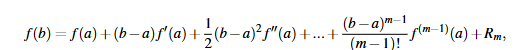

<ipython-input-12-dfc2bec5a8a4>:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coeff = (-1)**n / np.math.factorial(2*n + 1)


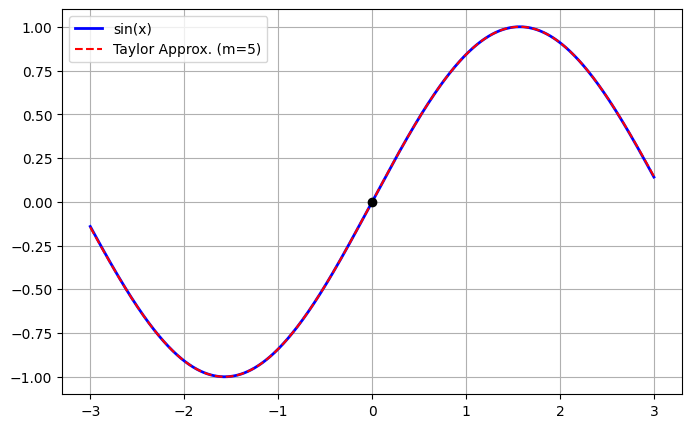

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#define function as sin(x)
def f(x):
    return np.sin(x)

#talor series function
def taylor_approximation(f, a, b, m):
    #initializes approximation
    approx = 0
    #iterates m times for each derivative
    for n in range(m):
        #computes coefficient
        coeff = (-1)**n / np.math.factorial(2*n + 1)
        #finds term
        term = coeff * (b - a)**(2*n + 1)
        #add to sum
        approx += term
    return approx


#apporximation centered around 0
a = 0
#1000 values between -7 and 7
x_values = np.linspace(-3, 3, 1000)
#number of derivatives
m = 5

#taylor approximation values
taylor_values = np.array([taylor_approximation(f, a, x, m) for x in x_values])
#actual values
actual_values = np.sin(x_values)

# Visualization
plt.figure(figsize=(8, 5))
plt.plot(x_values, actual_values, label="sin(x)", color="blue", linewidth=2)
plt.plot(x_values, taylor_values, label=f"Taylor Approx. (m={m})", linestyle="--", color="red")
plt.scatter(a, f(a), color="black", zorder=3)
plt.legend()
plt.grid(True)
plt.show()


##3.3 Unconstrained Optimization with Gradient Descent

Gradient descent is an iterative algorythm used to find the local minimums of a differentiable function in the form of

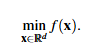

by iteratively updating x in the opposite direction of the gradient ∇f(x), the function value will decrese until it hits a plateau, which is the mininum.

The gradient descent update rule for every iteration is

x(k+1) = x(k) - a(k)∇f(x(k)), k = 0,1,2...

where a(k) > 0

Estimated minimum for function x^2 + 2x: [-0.99999558]


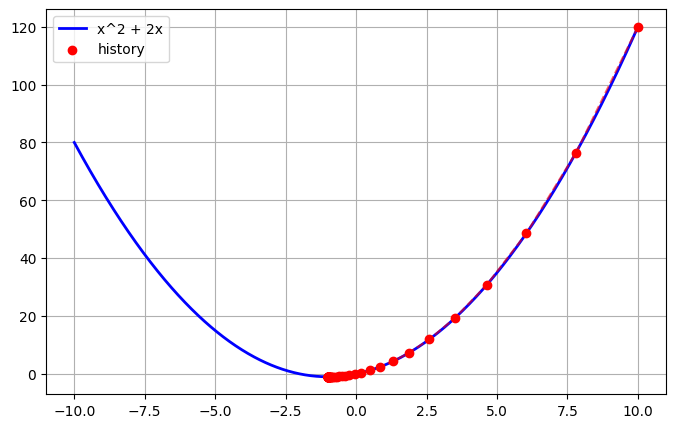

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Function
def gradient_descent(f, gradient, x0, a=0.1, iterations=100, tolerance=0.00001):
    #initial position
    x = x0
    #history of points by gradient descent
    history = [x]

    #computs through iterations
    #unless a minimum is found
    for i in range(iterations):

        #computes gradient
        grad = gradient(x)
        #moves x in direction of gradient
        x_new = x - a * grad
        #adds new value to history
        history.append(x_new)
        #if value is a minimum within tolerance break
        if np.linalg.norm(grad) < tolerance:
            break
        #otherwise update x for next iteration
        x = x_new

    return x, history

#define function as x^2 + 2x
def f(x):
    return x**2 + 2*x

#gradient of function above (derivative)
def gradient(x):
    return 2*x + 2

#starting point of algorythm
x0 = np.array([10.0])
#learning rate a(k)
a = 0.1
#number of times to run
iterations = 100

#compute gradient descent
x_min, history = gradient_descent(f, gradient, x0, a, iterations)

#print results
print(f"Estimated minimum for function x^2 + 2x: {x_min}")

#vizualization
#transforms history to np array so its easier to work woth
history = np.array(history)
#generates 1000 x values between -10 and 10
x_vals = np.linspace(-10, 10, 1000)
#generates corresponding y values
y_vals = f(x_vals)

#plots figure
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r'x^2 + 2x', color="blue", linewidth=2)
plt.scatter(history, f(history), color="red", label="history", zorder=3)
plt.plot(history, f(history), linestyle="--", color="red", alpha=0.6)
plt.legend()
plt.grid(True)
plt.show()